# Problem Statement:

### Given Clinical Paramater about a Patient, Can we predict whether or not they have Heart Diseases or not?




Data Dictionary

age: Displays the age of the individual.

sex: Displays the gender of the individual using the following format : 1 = male 0 = female

cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

exang- Exercise induced angina : 1 = yes 0 = no

oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

# Import Tools Needed

In [ ]:
pip install optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install optuna

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import linregress
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Model Import
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import pickle

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

import pickle

# Load the Data

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.shape

(918, 12)

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
data.shape

(918, 12)

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Pre-processing

In [ ]:
data['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

In [ ]:
data['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
data['Sex'] = data['Sex'].replace({'F':1,'M': 0})
data['ChestPainType'] = data['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
data['RestingECG'] = data['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'N': 0, 'Y': 1})
data['ST_Slope'] = data['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


# Feature Engineering

In [ ]:
data['Cholesterol_Age_Ratio'] = data['Cholesterol'] / data['Age']
data['MaxHR_Age_Ratio'] = data['MaxHR'] / data['Age']
data['BP_Cholesterol_Interaction'] = data['RestingBP'] * data['Cholesterol']
data['ChestPain_ST_Slope'] = data['ChestPainType'] * data['ST_Slope']
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 40, 60, 80], labels=['Young', 'Middle-aged', 'Senior'])
data['Exercise_Stress_Risk'] = data['ExerciseAngina'] * data['Oldpeak']
data['AgeGroup'] = data['AgeGroup'].replace({'Young': 0, 'Middle-aged':1, 'Senior': 2})
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Age_Ratio,MaxHR_Age_Ratio,BP_Cholesterol_Interaction,ChestPain_ST_Slope,AgeGroup,Exercise_Stress_Risk
0,40,0,1,140,289,0,0,172,0,0.0,0,0,7.225,4.3,40460,0,0,0.0


In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


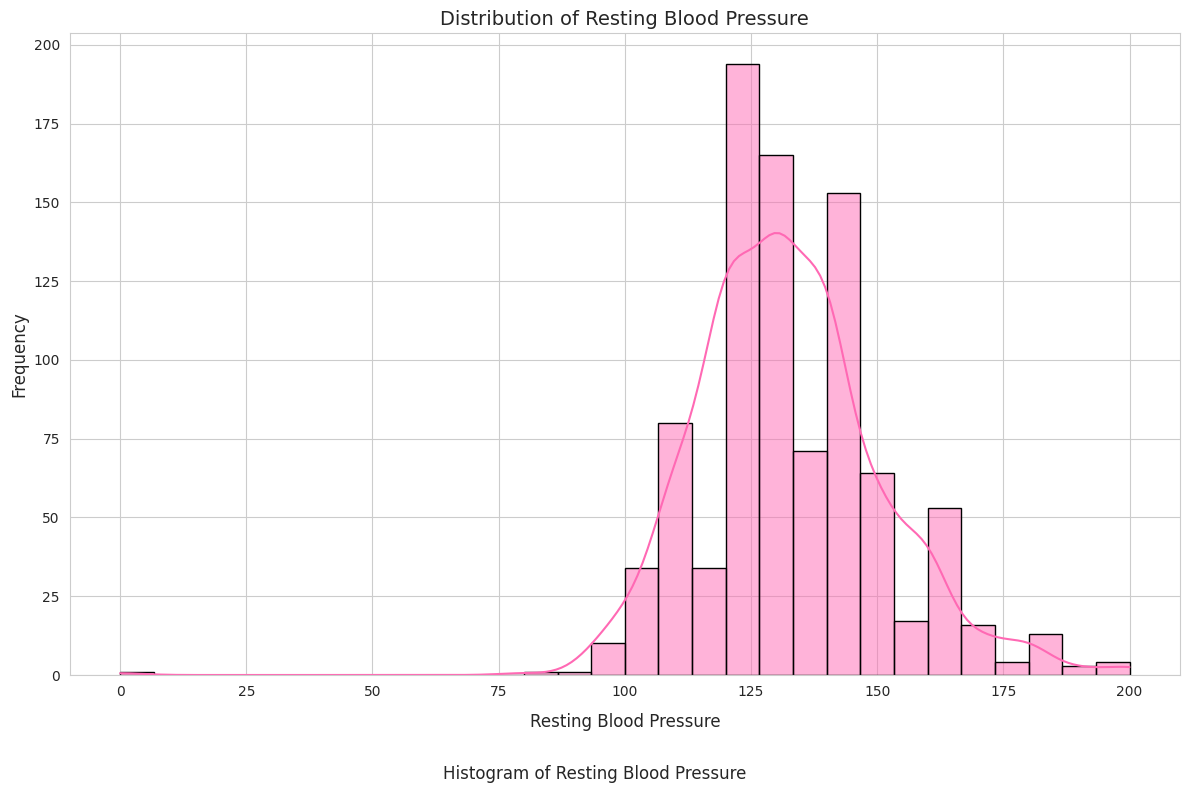

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data['RestingBP'],bins=30, kde=True, edgecolor='black', color='hotpink')

plt.xlabel('Resting Blood Pressure', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Resting Blood Pressure', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Resting Blood Pressure', ha='center', fontsize=12)

plt.show()

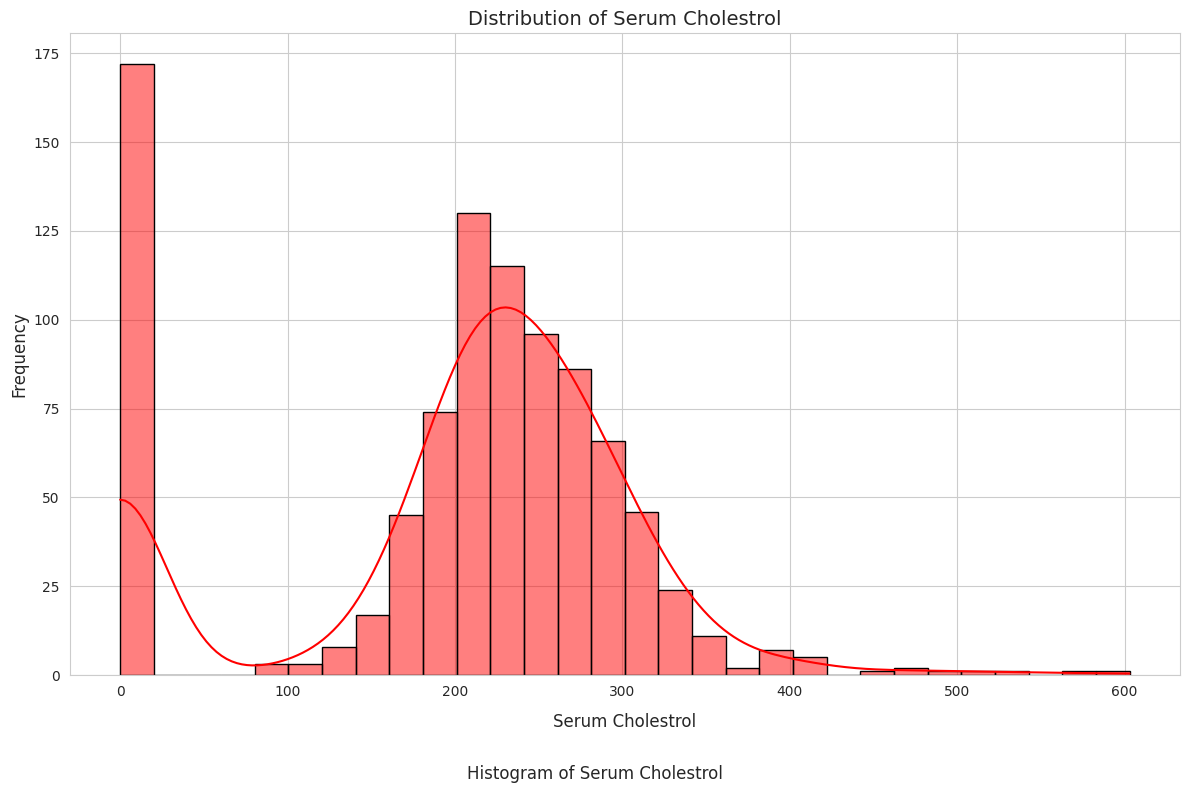

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot (data['Cholesterol'], bins=30, kde=True, edgecolor='black', color='red')

plt.xlabel('Serum Cholestrol', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Serum Cholestrol', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Serum Cholestrol', ha='center', fontsize=12)

plt.show()

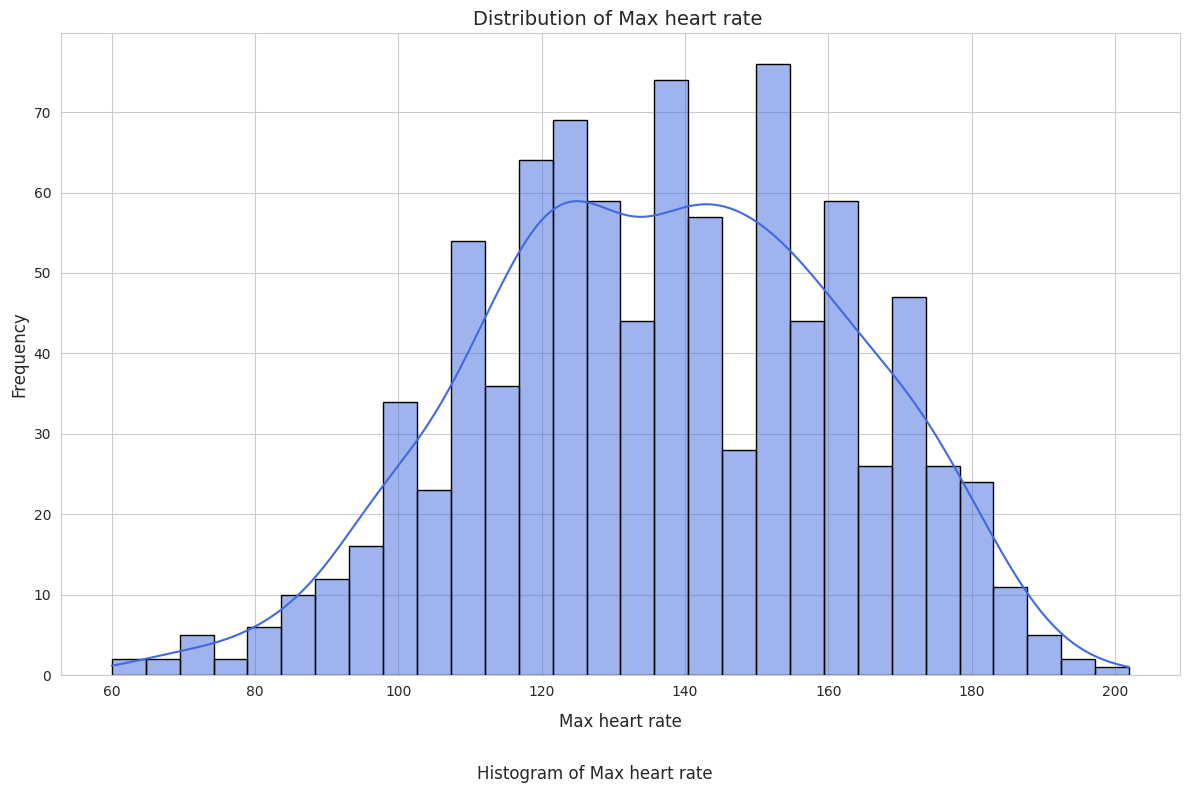

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data['MaxHR'], bins=30, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Max heart rate', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Max heart rate ', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.02, 'Histogram of Max heart rate', ha='center', fontsize=12)

plt.show()

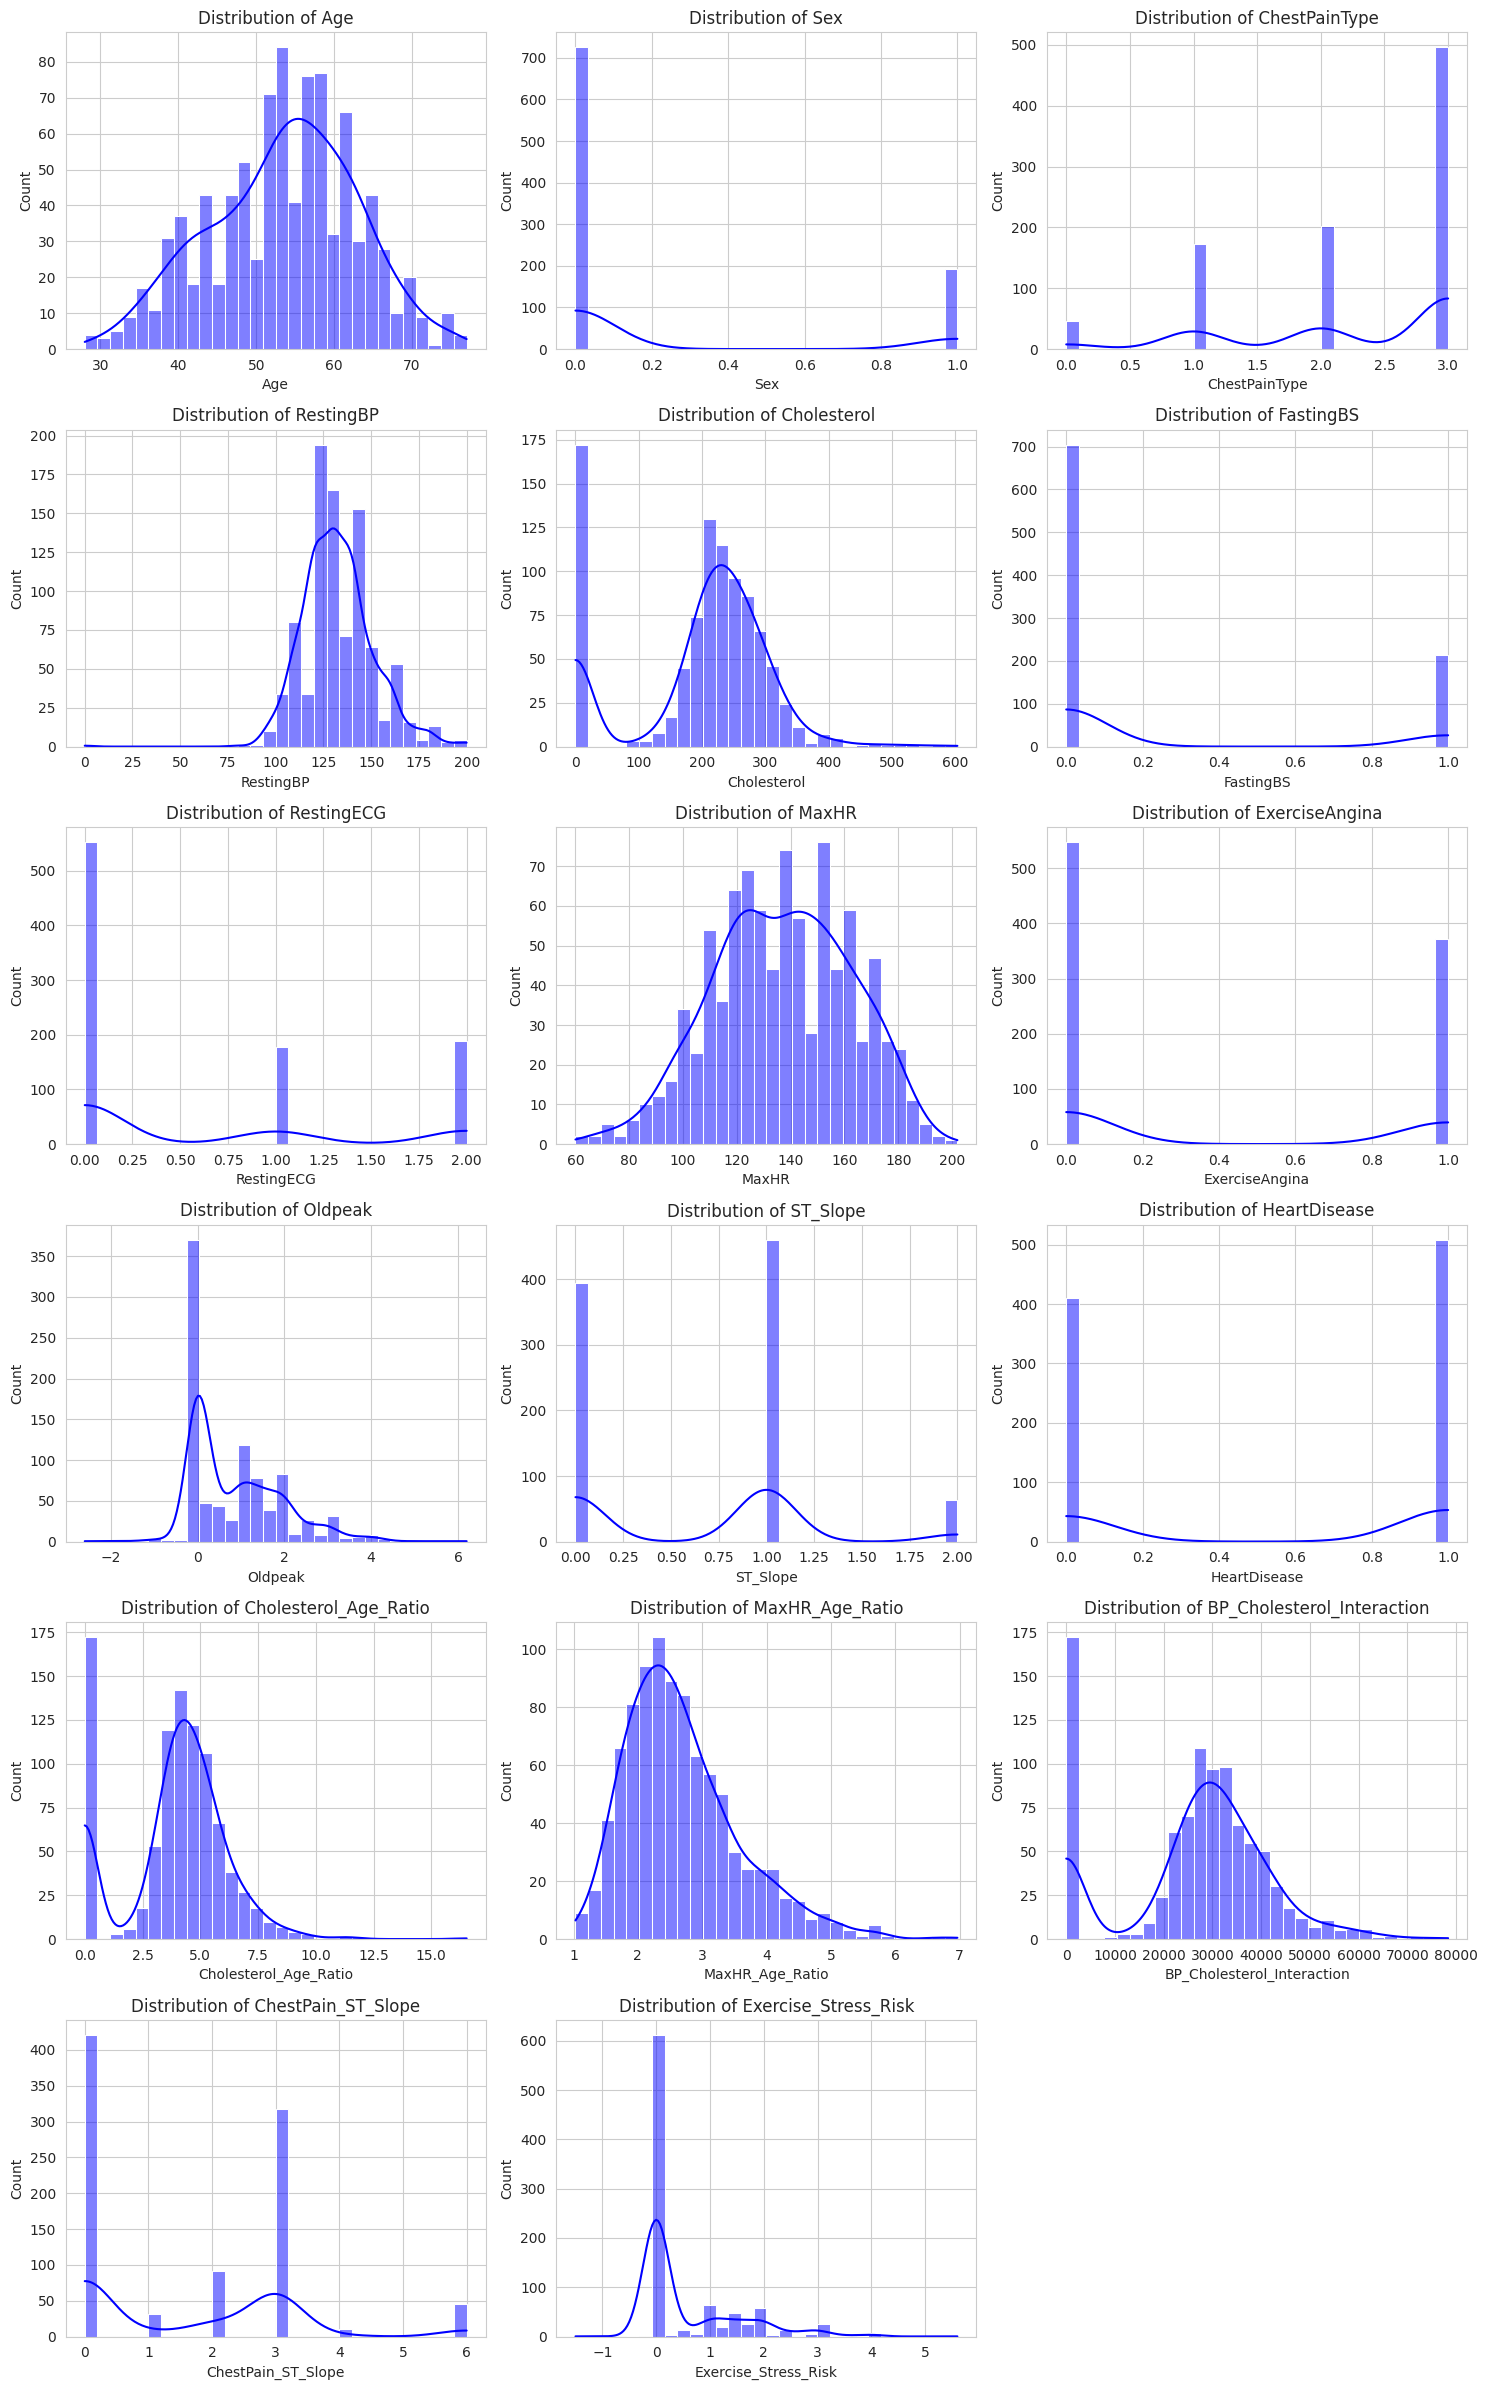

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


num_features = len(numerical_cols)
num_rows = int(np.ceil(num_features / 3))

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Outlier Treatment

In [ ]:
# Clipping
data["RestingBP"] = data["RestingBP"].clip(lower=80, upper=180)

# winsorize
data["Cholesterol"] = winsorize(data["Cholesterol"], limits=[0.01, 0.05])
data["Cholesterol_Age_Ratio"] = winsorize(data["Cholesterol_Age_Ratio"], limits=[0.01, 0.05])
data["MaxHR_Age_Ratio"] = winsorize(data["MaxHR_Age_Ratio"], limits=[0.01, 0.05])
data["BP_Cholesterol_Interaction"] = winsorize(data["BP_Cholesterol_Interaction"], limits=[0.01, 0.05])
data["Exercise_Stress_Risk"] = winsorize(data["Exercise_Stress_Risk"], limits=[0.01, 0.05])

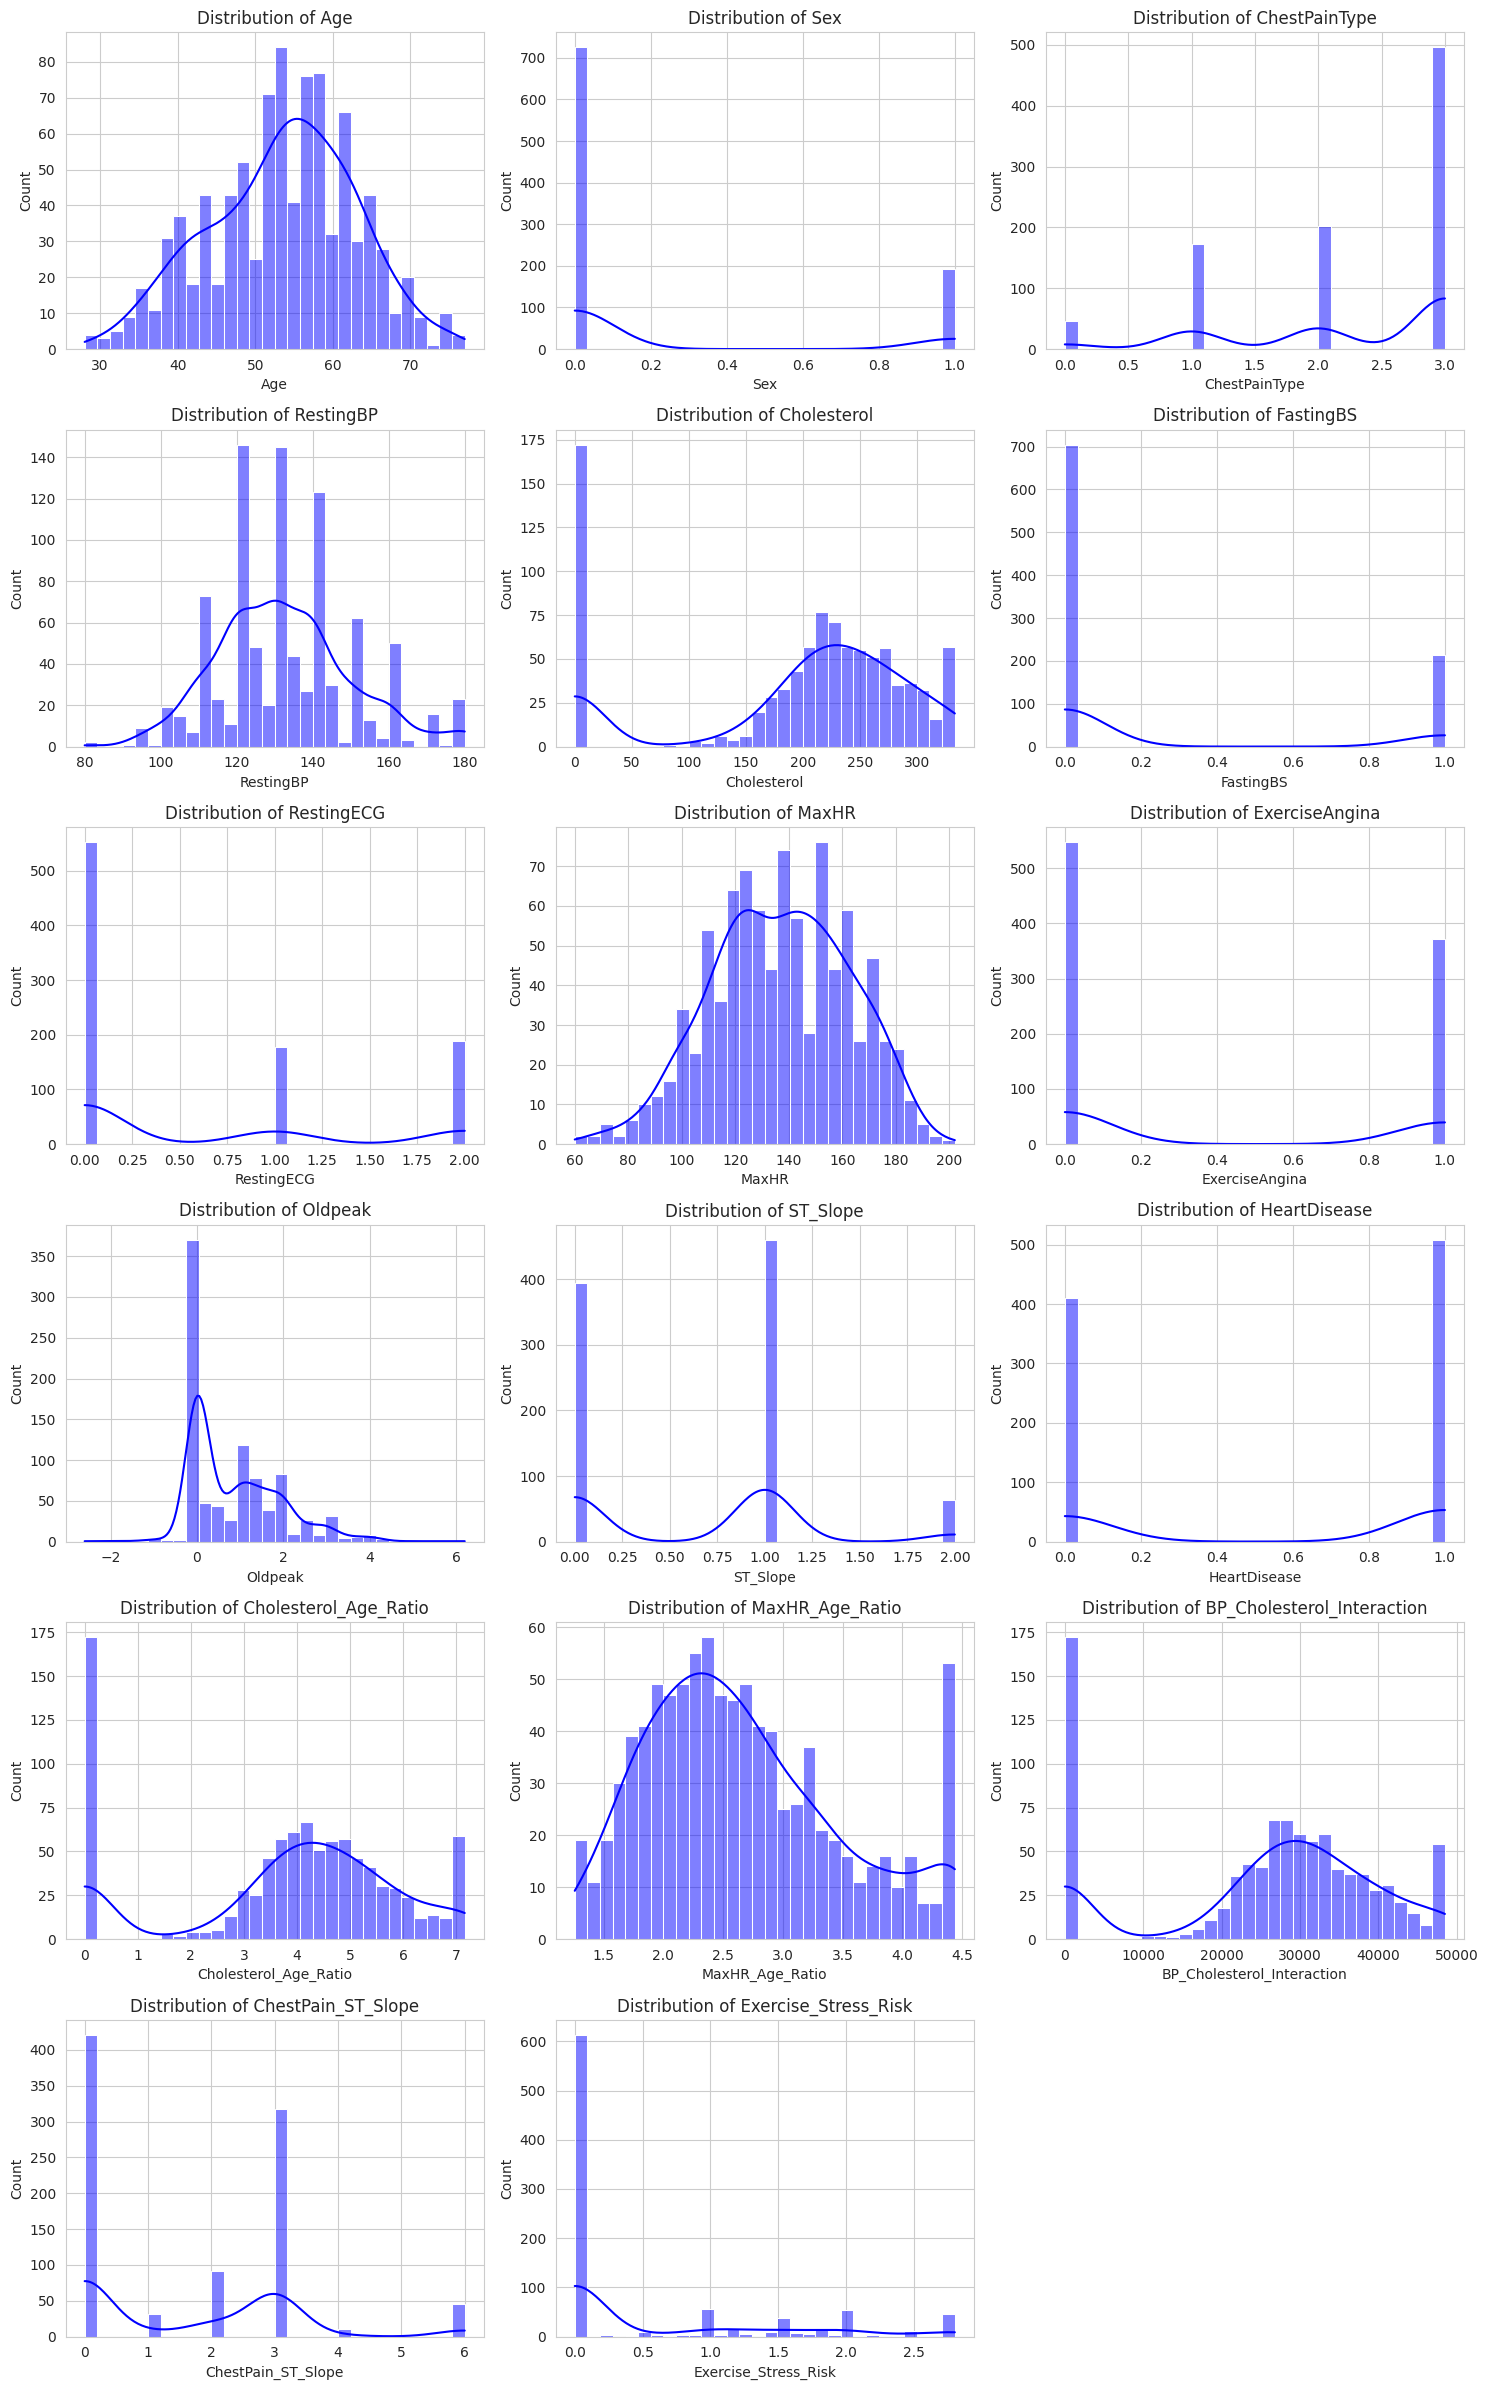

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


num_features = len(numerical_cols)
num_rows = int(np.ceil(num_features / 3))

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# EDA (Exploratory Data Analysis)

The goal of EDA is the find out more about the data and become a subject matter expert.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat them eg: Catogorical data, Numerical Data
3. What's missing from the data and how should we deal with them.
4. Where are Outliers and Why should we remove them.
5. How can you Add,Change,Remove features to get more from your data?

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


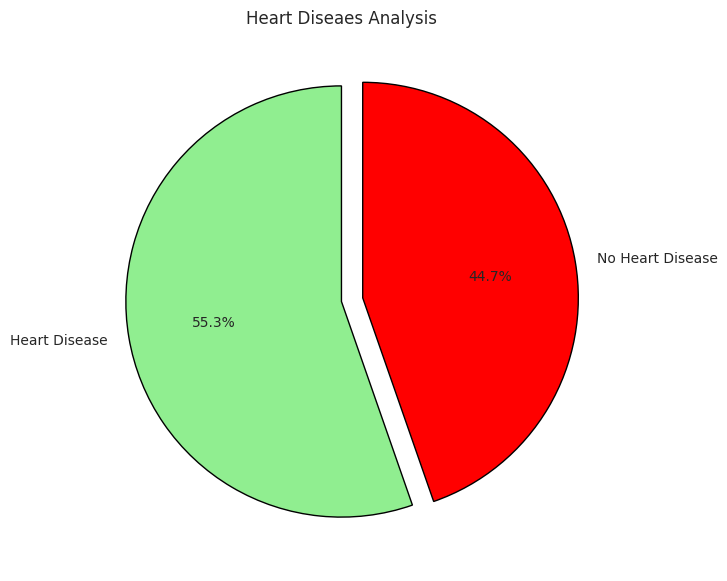

In [ ]:
Heart_counts = data['HeartDisease'].value_counts()

labels = ['Heart Disease', 'No Heart Disease']


colors = ['lightgreen','red']

plt.figure(figsize=(7, 7))
plt.pie(Heart_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1], startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Heart Diseaes Analysis')

# Show plot
plt.show()

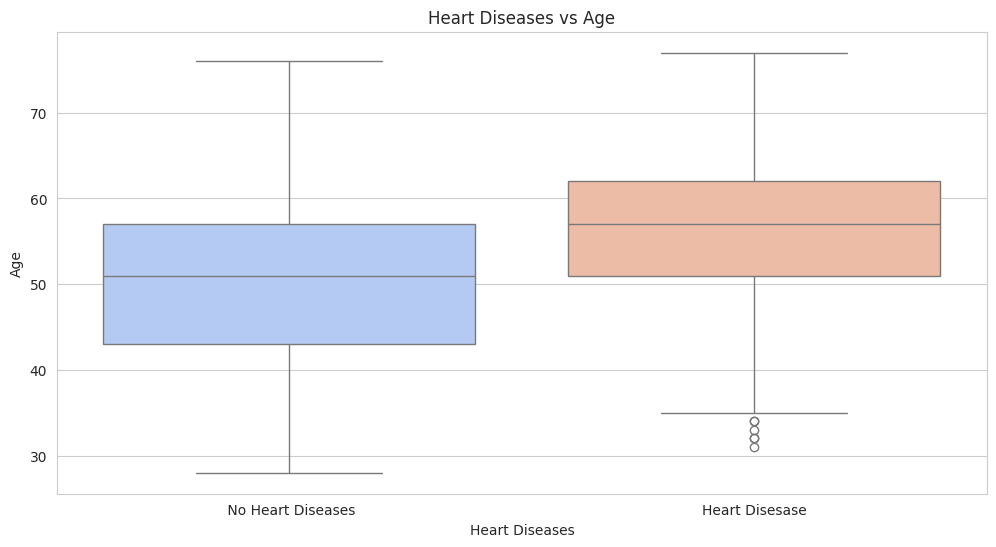

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='HeartDisease', y='Age', data=data, palette="coolwarm")
plt.xlabel('Heart Diseases')
plt.ylabel('Age')
plt.title('Heart Diseases vs Age')
plt.xticks([1,0],['Heart Disesase', ' No Heart Diseases'])
plt.show()

In [ ]:
# T-Test: Are Heart Diseases significant across age groups or is it only due to random chance?
t_stat, p_value = stats.ttest_ind(
    data[data['HeartDisease'] == 1]['Age'],
    data[data['HeartDisease'] == 0]['Age'],
    equal_var=False
)
print(f"T-Test: Heart Disease vs Age \nT-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Test: Heart Disease vs Age 
T-Statistic: 8.8225, P-Value: 0.0000


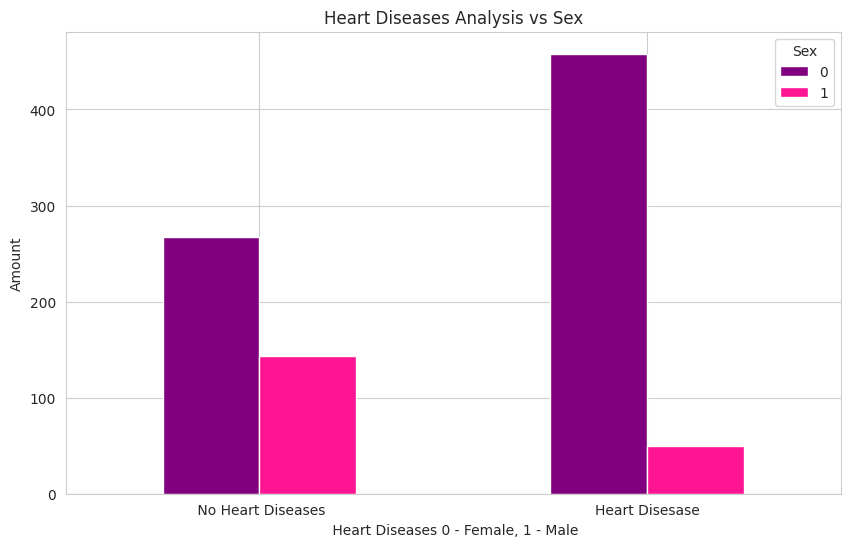

In [ ]:
pd.crosstab(data.HeartDisease,data.Sex).plot(kind='bar',
                                       figsize=(10,6),
                                       color=['purple','deeppink'])
plt.title('Heart Diseases Analysis vs Sex')
plt.xlabel(' Heart Diseases 0 - Female, 1 - Male')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.xticks([1,0],['Heart Disesase', ' No Heart Diseases'])
plt.show()

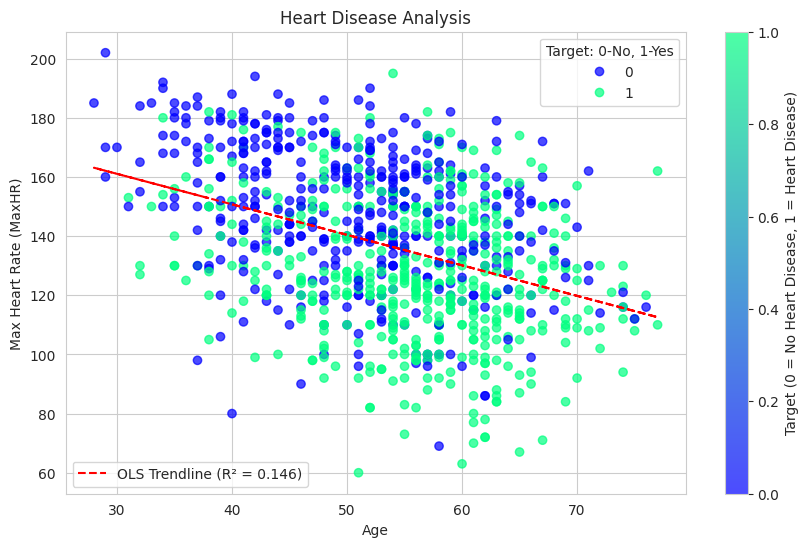

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(data["Age"],
                      data["MaxHR"],
                      c=data['HeartDisease'],
                      cmap='winter',
                      alpha=0.7)

# Calculate OLS regression
slope, intercept, r_value, p_value, std_err = linregress(data["Age"], data["MaxHR"])
line = slope * data["Age"] + intercept

# Plot OLS line
ax.plot(data["Age"], line, color='red', linestyle='--',
        label=f'OLS Trendline (R² = {r_value**2:.3f})')

# Title and labels
ax.set(title="Heart Disease Analysis",
       xlabel='Age',
       ylabel="Max Heart Rate (MaxHR)")

# Add legend for OLS Trendline
ols_legend = ax.legend(loc='lower left')

# Add legend for scatterplot colors
scatter_legend = ax.legend(*scatter.legend_elements(), title='Target: 0-No, 1-Yes', loc='upper right')

# Re-add OLS legend to the plot (so both legends display)
ax.add_artist(ols_legend)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Target (0 = No Heart Disease, 1 = Heart Disease)")

plt.show()

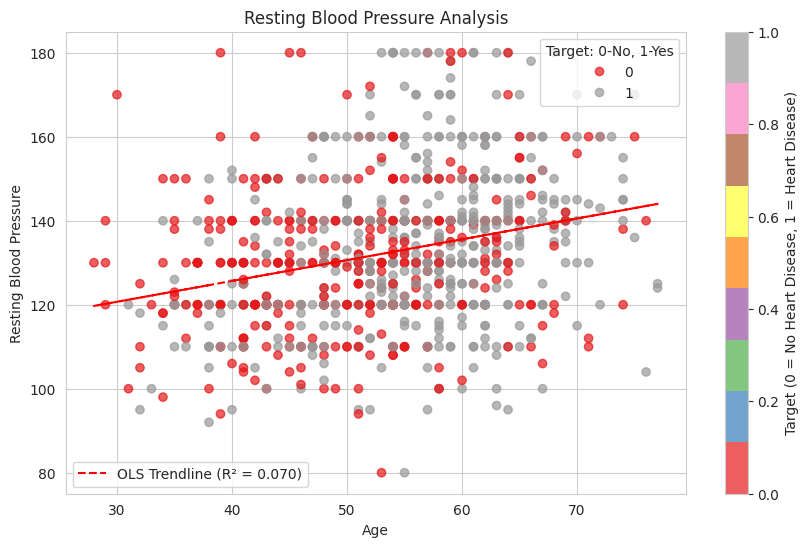

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(data["Age"],
                      data["RestingBP"],
                      c=data['HeartDisease'],
                      cmap='Set1',
                      alpha=0.7)

# Calculate OLS regression
slope, intercept, r_value, p_value, std_err = linregress(data["Age"], data["RestingBP"])
line = slope * data["Age"] + intercept

# Plot OLS line
ax.plot(data["Age"], line, color='red', linestyle='--',
        label=f'OLS Trendline (R² = {r_value**2:.3f})')

# Title and labels
ax.set(title="Resting Blood Pressure Analysis",
       xlabel='Age',
       ylabel="Resting Blood Pressure")

# Add legend for OLS Trendline
ols_legend = ax.legend(loc='lower left')

# Add legend for scatterplot colors
scatter_legend = ax.legend(*scatter.legend_elements(), title='Target: 0-No, 1-Yes', loc='upper right')

# Re-add OLS legend to the plot (so both legends display)
ax.add_artist(ols_legend)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Target (0 = No Heart Disease, 1 = Heart Disease)")

plt.show()

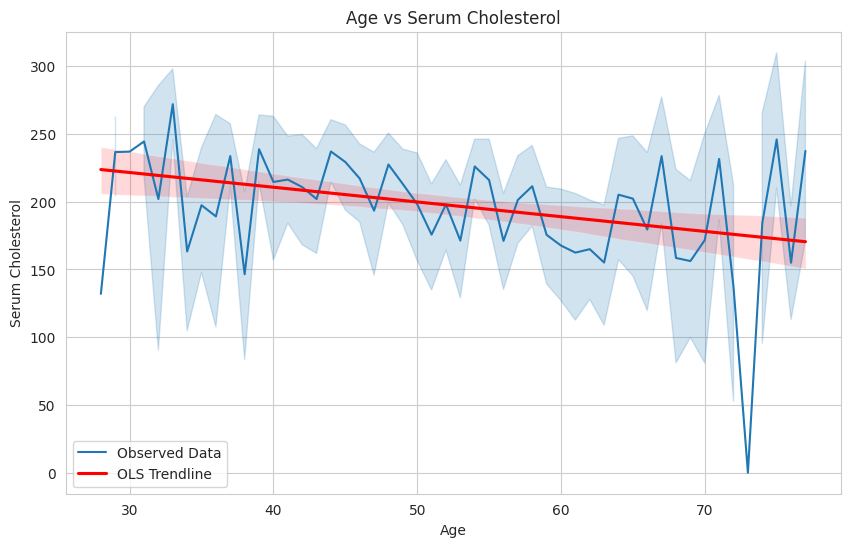

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Age',y='Cholesterol',data=data, label='Observed Data')
sns.regplot(x='Age', y='Cholesterol', data=data, scatter=False, color='red', label="OLS Trendline")
plt.title("Age vs Serum Cholesterol")
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol")
plt.legend()
plt.show()

In [ ]:
data['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
0,547
1,371


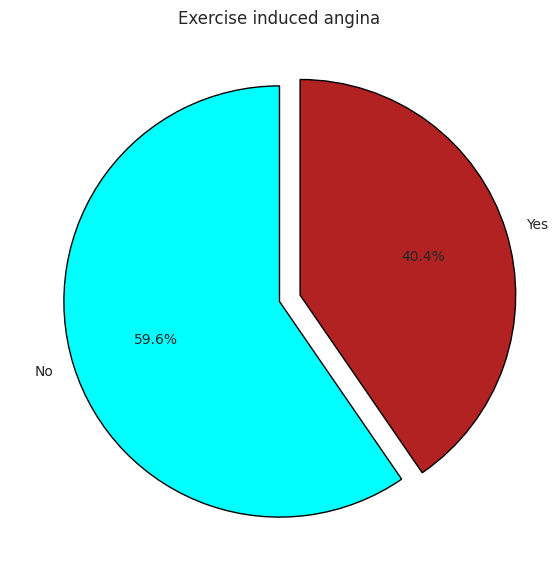

In [ ]:
angina_count = data['ExerciseAngina'].value_counts()

labels = ["No", "Yes"]


colors = ['cyan','firebrick']

plt.figure(figsize=(7, 7))
plt.pie(angina_count, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1], startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Exercise induced angina')

# Show plot
plt.show()

In [ ]:
print(data["ExerciseAngina"].value_counts(normalize=True) * 100)

ExerciseAngina
0    59.586057
1    40.413943
Name: proportion, dtype: float64


# Check The Distribution for the Spread of  the data


# Frequency for Cp type

0 - Typical angina:  Chest pain related to decrease in blood supply to the heart

1 - Atypical angina: Chest pain not related to heart

2 - Non anginal Pain: Typical esophageal Spasms(non heart related)

3 - Asymptomatic: Chest Pain not showing sign of diseases


In [ ]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Age_Ratio,MaxHR_Age_Ratio,BP_Cholesterol_Interaction,ChestPain_ST_Slope,AgeGroup,Exercise_Stress_Risk
0,40,0,1,140,289,0,0,172,0,0.0,0,0,7.163636,4.3,40460,0,0,0.0


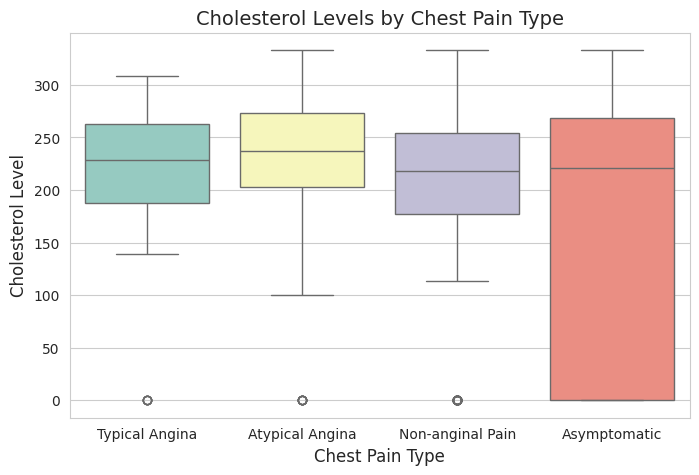

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="ChestPainType", y="Cholesterol", data=data, palette="Set3")

plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Cholesterol Level", fontsize=12)
plt.title("Cholesterol Levels by Chest Pain Type", fontsize=14)
plt.xticks([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

plt.show()

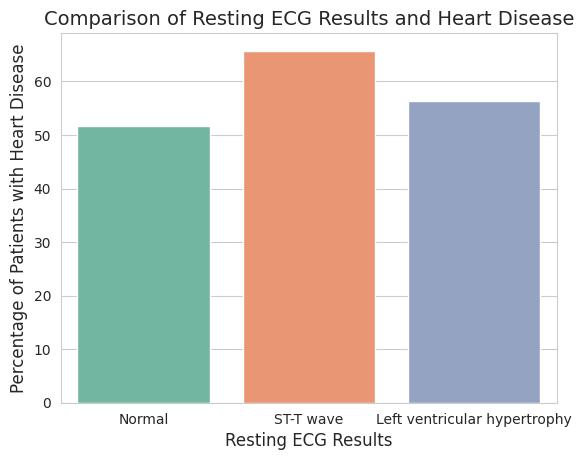

In [ ]:
count_ECG = data.groupby("RestingECG")["HeartDisease"].mean() * 100

count_ECG_df = count_ECG.reset_index()
count_ECG_df.columns = ["RestingECG", "HeartDisease Percentage"]

ax = sns.barplot(x="RestingECG", y="HeartDisease Percentage", data=count_ECG_df, palette="Set2")

plt.xlabel("Resting ECG Results", fontsize=12)
plt.ylabel("Percentage of Patients with Heart Disease", fontsize=12)
plt.title("Comparison of Resting ECG Results and Heart Disease", fontsize=14)


plt.xticks([0,1,2], ['Normal', 'ST-T wave', 'Left ventricular hypertrophy'])

plt.show()

In [ ]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_Age_Ratio,MaxHR_Age_Ratio,BP_Cholesterol_Interaction,ChestPain_ST_Slope,AgeGroup,Exercise_Stress_Risk
0,40,0,1,140,289,0,0,172,0,0.0,0,0,7.163636,4.3,40460,0,0,0.0


0.0	No ST depression	✅ Normal heart function

1.0 - 2.0	Mild ST depression	⚠️ Potential heart stress

2.0 or more	Significant ST depression	🚨 High risk of heart disease

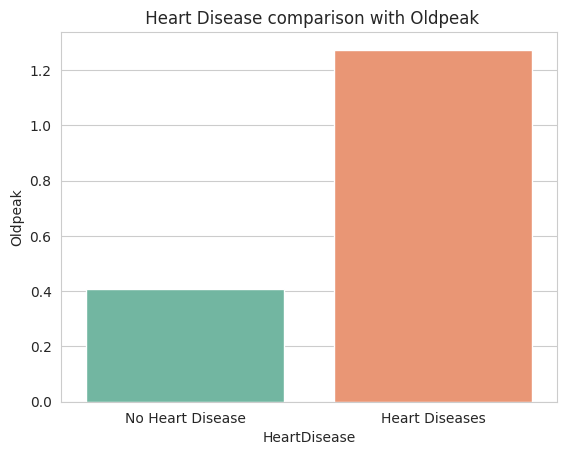

In [ ]:
old_peak = data.groupby("HeartDisease")["Oldpeak"].mean()
old_peak_df = old_peak.reset_index()
old_peak_df.columns = ["HeartDisease", "Oldpeak"]

ax = sns.barplot(x="HeartDisease", y="Oldpeak", data=old_peak_df, palette="Set2")
plt.title(" Heart Disease comparison with Oldpeak")
plt.xticks([0,1],['No Heart Disease','Heart Diseases'])
plt.show()

# Correlation Matrix

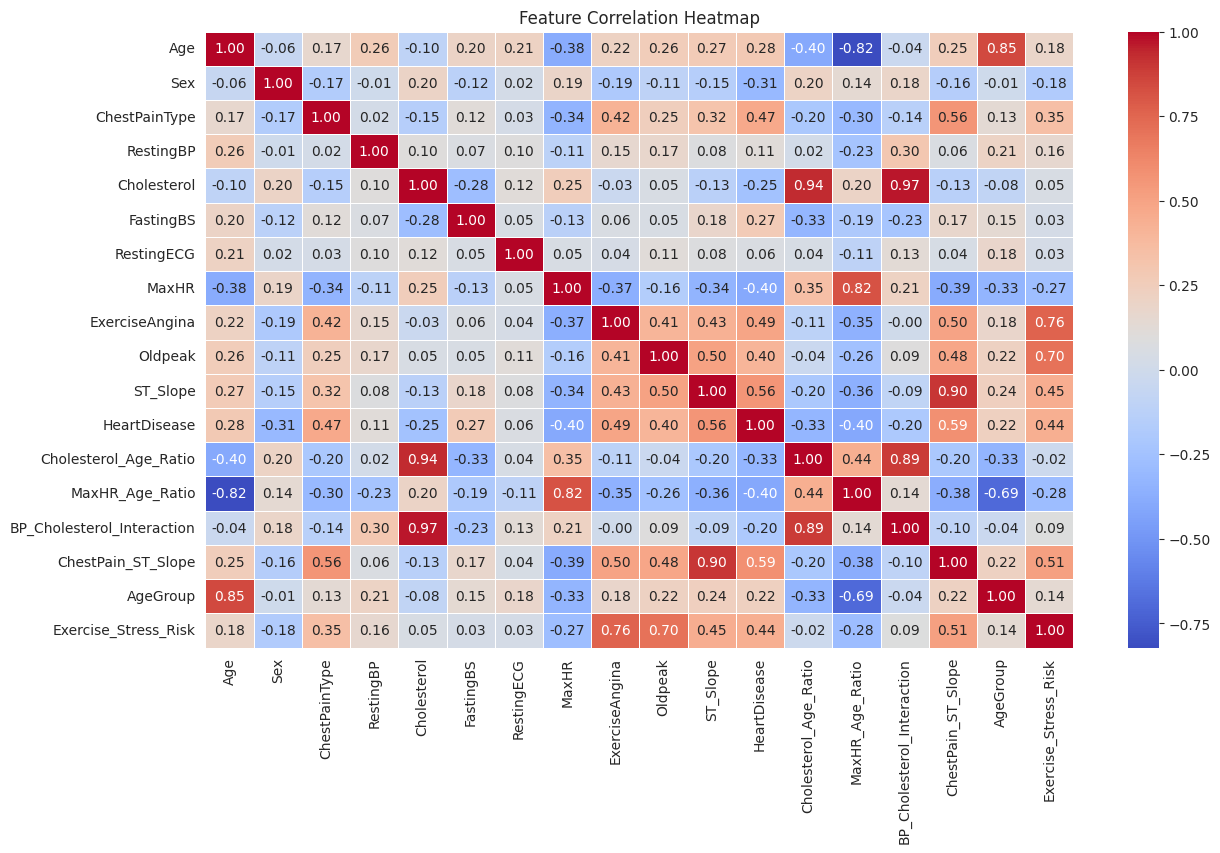

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
data.drop(columns=['Age','Cholesterol','MaxHR','ST_Slope','BP_Cholesterol_Interaction'],axis=1, inplace=True)
data.head(1)

,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,HeartDisease,Cholesterol_Age_Ratio,MaxHR_Age_Ratio,ChestPain_ST_Slope,AgeGroup,Exercise_Stress_Risk
0,0,1,140,0,0,0,0.0,0,7.163636,4.3,0,0,0.0


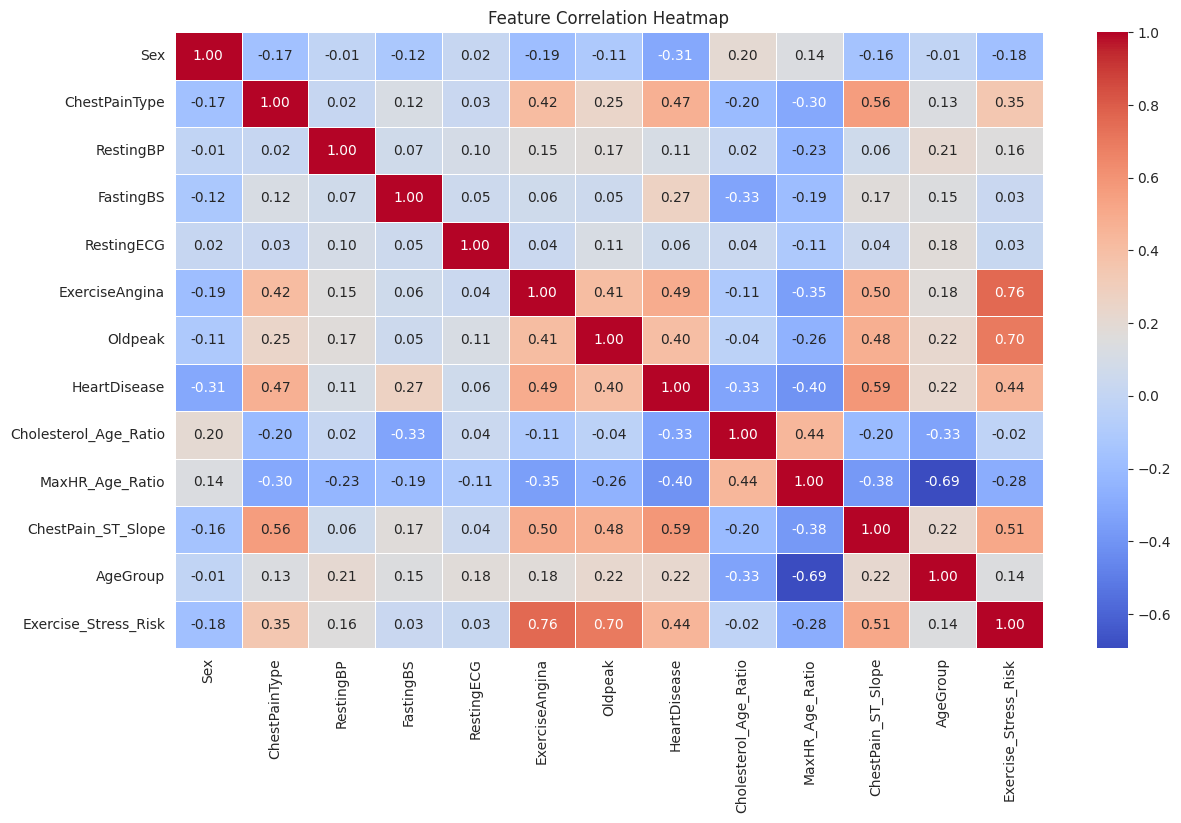

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = data.drop('HeartDisease',axis=1)

y = data['HeartDisease']

In [ ]:
np.random.seed(42)

# split into train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Feature Importance using simple Random Forest model**

ChestPain_ST_Slope: 0.2219
Cholesterol_Age_Ratio: 0.1263
MaxHR_Age_Ratio: 0.1229
Oldpeak: 0.1062
ChestPainType: 0.0947
ExerciseAngina: 0.0899
RestingBP: 0.0742
Exercise_Stress_Risk: 0.0611
Sex: 0.0331
RestingECG: 0.0261


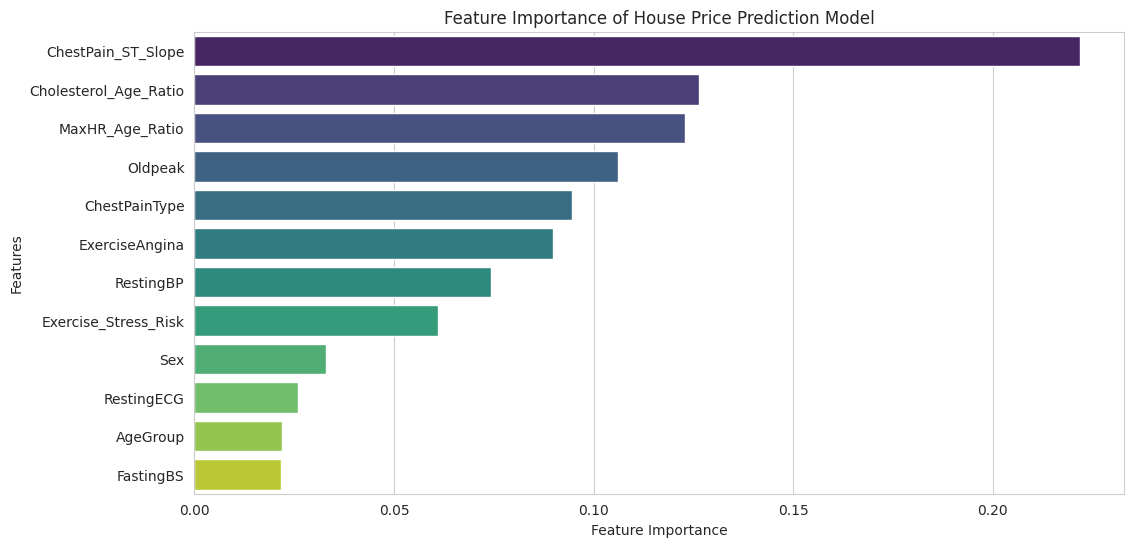

In [ ]:
# model_test = RandomForestClassifier(n_estimators=100, random_state=42)
# model_test.fit(X_train, y_train)

# # Get feature importance scores
# feature_importance = model_test.feature_importances_
# feature_names = X_train.columns

# # Display importance in descending order
# sorted_idx = np.argsort(feature_importance)[::-1]
# for i in sorted_idx[:10]:  # Show top 10
#     print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

# plt.figure(figsize=(12, 6))
# sns.barplot(x=feature_importance[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="viridis")
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance of House Price Prediction Model')
# plt.show()

In [ ]:
data.to_csv("cleaned_data.csv", index=False)

# Modeling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building A Machine Learning Classification Model

## Base Line Model


In [ ]:
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [ ]:
def fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        model.fit(X_train_scaled, y_train)
        fitted_models[name] = model

        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

        model_scores[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc if roc_auc is not None else "N/A"
        }

        print(f"\nModel: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if roc_auc is not None:
            print(f"ROC AUC Score: {roc_auc:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return model_scores, fitted_models

In [ ]:
model_scores, fitted_models = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)


Training LogisticRegression...

Model: LogisticRegression
Accuracy: 0.8370
Precision: 0.9326
Recall: 0.7757
F1 Score: 0.8469
ROC AUC Score: 0.9048

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        77
           1       0.93      0.78      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.86      0.84      0.84       184


Training KNN...

Model: KNN
Accuracy: 0.8370
Precision: 0.8738
Recall: 0.8411
F1 Score: 0.8571
ROC AUC Score: 0.9050

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184


Training Random Forest...

Mode

# Model Comparison

In [ ]:
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2
    if hasattr(model, "predict_proba"):
        y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    else:
        roc_auc = None
    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy],
        'ROC AUC': [roc_auc]
    })

results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)], ignore_index=True)

results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)



Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy,ROC AUC
Model,,,,
LogisticRegression,0.8569,0.8370,0.8470,0.9048
KNN,0.8733,0.8370,0.8551,0.9050
Random Forest,1.0000,0.8478,0.9239,0.9291
Gradient Boosting,0.9428,0.8315,0.8872,0.9238
AdaBoost,0.8597,0.8587,0.8592,0.9357
LightGBM,1.0000,0.8478,0.9239,0.9343
CatBoost,0.9796,0.8370,0.9083,0.9370


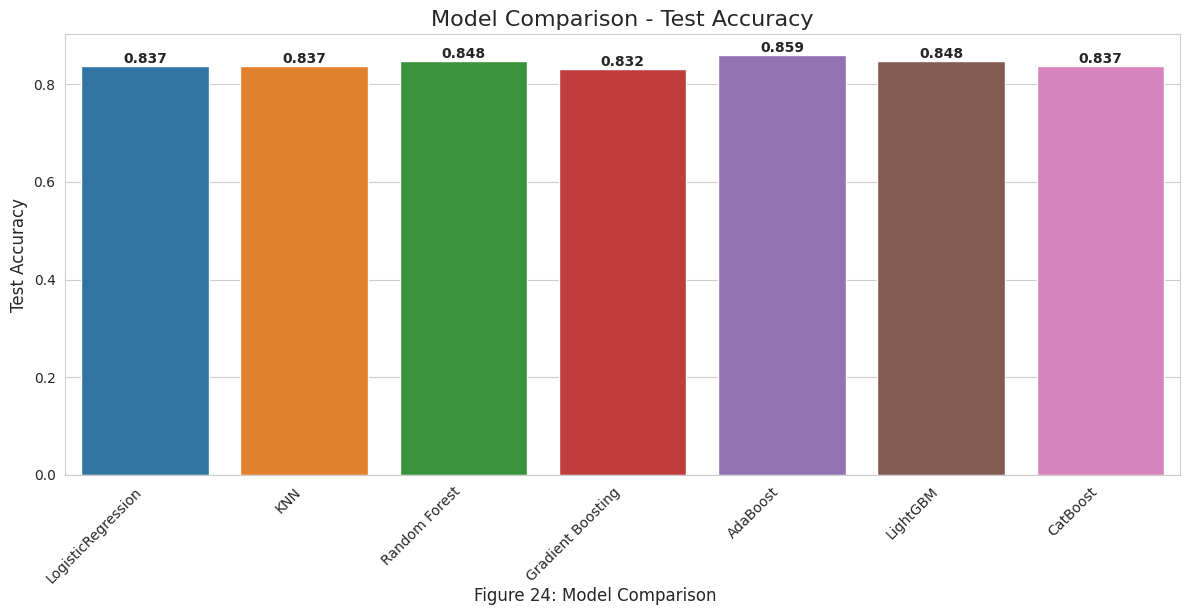

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)
plt.show()

In [ ]:
tuned_models = {
    "Logistic Regression": {
        'model': LogisticRegression(class_weight="balanced"),
        'params': {
            'fit_intercept': optuna.distributions.CategoricalDistribution([True, False]),
            'solver': optuna.distributions.CategoricalDistribution(['lbfgs', 'liblinear'])
        }
    },

    "CatBoost": {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'iterations': optuna.distributions.IntDistribution(100, 700, step=100),
            'learning_rate': optuna.distributions.FloatDistribution(0.01, 0.2),
            'depth': optuna.distributions.IntDistribution(3, 6),
            'l2_leaf_reg': optuna.distributions.IntDistribution(5, 15),
            'border_count': optuna.distributions.IntDistribution(32, 128),
            'bagging_temperature': optuna.distributions.FloatDistribution(0.2, 1.0),
            'boosting_type': optuna.distributions.CategoricalDistribution(['Ordered', 'Plain'])
        }
    },

    "LightGBM": {
        'model': LGBMClassifier(verbose=-1),
        'params': {
            'n_estimators': optuna.distributions.IntDistribution(100, 500, step=100),
            'learning_rate': optuna.distributions.FloatDistribution(0.01, 0.2),
            'num_leaves': optuna.distributions.IntDistribution(10, 50),
            'max_depth': optuna.distributions.IntDistribution(3, 10),
            'min_child_samples': optuna.distributions.IntDistribution(20, 50),
            'subsample': optuna.distributions.FloatDistribution(0.7, 1.0),
            'colsample_bytree': optuna.distributions.FloatDistribution(0.7, 1.0),
            'reg_alpha': optuna.distributions.FloatDistribution(0.0, 1.0),
            'reg_lambda': optuna.distributions.FloatDistribution(0.0, 1.0),
            'boosting_type': optuna.distributions.CategoricalDistribution(['gbdt', 'dart'])
        }
    },

    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': optuna.distributions.IntDistribution(5, 31, step=2),
            'weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
            'metric': optuna.distributions.CategoricalDistribution(['minkowski']),
            'p': optuna.distributions.IntDistribution(1, 2)
        }
    },

    "Random Forest": {
        'model': RandomForestClassifier(class_weight="balanced"),
        'params': {
            'n_estimators': optuna.distributions.IntDistribution(50, 300, step=50),
            'max_depth': optuna.distributions.IntDistribution(6, 12),
            'min_samples_split': optuna.distributions.IntDistribution(5, 15),
            'min_samples_leaf': optuna.distributions.IntDistribution(2, 5),
            'max_features': optuna.distributions.CategoricalDistribution(['sqrt']),
            'bootstrap': optuna.distributions.CategoricalDistribution([True])
        }
    },

    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': optuna.distributions.IntDistribution(100, 500, step=100),
            'learning_rate': optuna.distributions.FloatDistribution(0.01, 0.2),
            'max_depth': optuna.distributions.IntDistribution(3, 5),
            'min_samples_split': optuna.distributions.IntDistribution(5, 15),
            'min_samples_leaf': optuna.distributions.IntDistribution(2, 5),
            'subsample': optuna.distributions.FloatDistribution(0.7, 1.0)
        }
    },

    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': optuna.distributions.IntDistribution(100, 400, step=100),
            'learning_rate': optuna.distributions.FloatDistribution(0.01, 0.2),
            'algorithm': optuna.distributions.CategoricalDistribution(['SAMME', 'SAMME.R'])
        }
    },
}


In [ ]:
def fit_models_with_early_stopping(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test):

    np.random.seed(42)
    model_scores_1 = {}
    fitted_models_1 = {}

    for name, model_info in tuned_models.items():
        print(f"\nOptimizing {name}...")

        # Check if model supports early stopping (e.g., boosting models)
        supports_early_stopping = any(param in model_info['params'] for param in ["n_estimators", "max_iter"])

        # Adjust parameters to include early stopping
        if supports_early_stopping:
            model_info['params']['n_estimators'] = [100, 500, 1000]  # Tune n_estimators if applicable

        optuna_search = OptunaSearchCV(
            model_info['model'],
            model_info['params'],
            n_trials=100,
            cv=7,
            scoring='accuracy',
            n_jobs=-1
        )

        try:
            if supports_early_stopping:
                optuna_search.fit(
                    X_train_scaled, y_train,
                    eval_set=[(X_test_scaled, y_test)],
                    eval_metric="accuracy",
                    early_stopping_rounds=20
                )
            else:
                optuna_search.fit(X_train_scaled, y_train)
        except TypeError:
            optuna_search.fit(X_train_scaled, y_train)

        best_model = optuna_search.best_estimator_
        fitted_models_1[name] = best_model

        # Make predictions
        y_pred = best_model.predict(X_test_scaled)
        y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

        # Store scores
        model_scores_1[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }

        # Print results
        print(f"\nModel: {name}")
        print(f"Best parameters: {optuna_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if y_prob is not None:
            print(f"ROC AUC Score: {roc_auc:.4f}")

    return model_scores_1, fitted_models_1

In [ ]:
print("Starting hyperparameter tuning...")
model_scores_1, fitted_models_1 = fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test)

[I 2025-02-26 00:49:06,482] A new study created in memory with name: no-name-04d74f6b-6b73-4700-9862-1d73f3455e45
[I 2025-02-26 00:49:06,570] Trial 0 finished with value: 0.8501177394034537 and parameters: {'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:06,573] Trial 1 finished with value: 0.8501177394034537 and parameters: {'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:06,663] Trial 2 finished with value: 0.8501177394034537 and parameters: {'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8501177394034537.


Starting hyperparameter tuning...

Optimizing Logistic Regression...


[I 2025-02-26 00:49:06,770] Trial 3 finished with value: 0.8487571951857665 and parameters: {'fit_intercept': False, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:06,857] Trial 4 finished with value: 0.8487441130298272 and parameters: {'fit_intercept': True, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:06,971] Trial 5 finished with value: 0.8487441130298272 and parameters: {'fit_intercept': True, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:07,054] Trial 7 finished with value: 0.8473966509680795 and parameters: {'fit_intercept': False, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:07,065] Trial 6 finished with value: 0.8487571951857665 and parameters: {'fit_intercept': False, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8501177394034537.
[I 2025-02-26 00:49:07,141] Trial 8 finished with value: 0.84739665096807


Model: Logistic Regression
Best parameters: {'fit_intercept': True, 'solver': 'liblinear'}
Accuracy: 0.8315
Precision: 0.9318
Recall: 0.7664
F1 Score: 0.8410
ROC AUC Score: 0.9025

Optimizing CatBoost...


[I 2025-02-26 00:49:14,438] Trial 1 finished with value: 0.8610151753008896 and parameters: {'iterations': 200, 'learning_rate': 0.09299669663565313, 'depth': 5, 'l2_leaf_reg': 14, 'border_count': 45, 'bagging_temperature': 0.9128084614731684, 'boosting_type': 'Plain'}. Best is trial 1 with value: 0.8610151753008896.
[I 2025-02-26 00:49:42,648] Trial 2 finished with value: 0.8446755625327054 and parameters: {'iterations': 400, 'learning_rate': 0.14623281378978498, 'depth': 5, 'l2_leaf_reg': 9, 'border_count': 60, 'bagging_temperature': 0.5771006377287682, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.8610151753008896.
[I 2025-02-26 00:49:56,007] Trial 0 finished with value: 0.8474228152799581 and parameters: {'iterations': 700, 'learning_rate': 0.19727729413723286, 'depth': 4, 'l2_leaf_reg': 13, 'border_count': 119, 'bagging_temperature': 0.4935939747934315, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.8610151753008896.
[I 2025-02-26 00:50:15,632] Trial 3 fin


Model: CatBoost
Best parameters: {'iterations': 200, 'learning_rate': 0.06182624026474701, 'depth': 6, 'l2_leaf_reg': 8, 'border_count': 94, 'bagging_temperature': 0.5356180601549371, 'boosting_type': 'Ordered'}
Accuracy: 0.8424
Precision: 0.8824
Recall: 0.8411
F1 Score: 0.8612
ROC AUC Score: 0.9370

Optimizing LightGBM...


[I 2025-02-26 01:01:25,298] Trial 1 finished with value: 0.8596153846153847 and parameters: {'n_estimators': 300, 'learning_rate': 0.04144912049190639, 'num_leaves': 20, 'max_depth': 6, 'min_child_samples': 22, 'subsample': 0.8654586604781132, 'colsample_bytree': 0.9973121849200965, 'reg_alpha': 0.3091577251915, 'reg_lambda': 0.5221893684128319, 'boosting_type': 'gbdt'}. Best is trial 1 with value: 0.8596153846153847.
[I 2025-02-26 01:01:25,896] Trial 0 finished with value: 0.8664442700156986 and parameters: {'n_estimators': 300, 'learning_rate': 0.05255013096414728, 'num_leaves': 23, 'max_depth': 3, 'min_child_samples': 49, 'subsample': 0.8927914274440023, 'colsample_bytree': 0.759244259606254, 'reg_alpha': 0.40872187306548813, 'reg_lambda': 0.5237408754549904, 'boosting_type': 'dart'}. Best is trial 0 with value: 0.8664442700156986.
[I 2025-02-26 01:01:26,463] Trial 3 finished with value: 0.8582940868655153 and parameters: {'n_estimators': 100, 'learning_rate': 0.10323850454967283, '


Model: LightGBM
Best parameters: {'n_estimators': 100, 'learning_rate': 0.10309684433506636, 'num_leaves': 39, 'max_depth': 9, 'min_child_samples': 31, 'subsample': 0.7499560424731186, 'colsample_bytree': 0.8974511771273678, 'reg_alpha': 0.18861753595811562, 'reg_lambda': 0.35476453257292423, 'boosting_type': 'gbdt'}
Accuracy: 0.8370
Precision: 0.8812
Recall: 0.8318
F1 Score: 0.8558
ROC AUC Score: 0.9381

Optimizing KNN...


[I 2025-02-26 01:02:21,311] Trial 2 finished with value: 0.8473574045002615 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'metric': 'minkowski', 'p': 1}. Best is trial 1 with value: 0.8541732077446363.
[I 2025-02-26 01:02:21,357] Trial 3 finished with value: 0.8473574045002615 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'minkowski', 'p': 1}. Best is trial 1 with value: 0.8541732077446363.
[I 2025-02-26 01:02:21,442] Trial 4 finished with value: 0.8432757718472004 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'minkowski', 'p': 2}. Best is trial 1 with value: 0.8541732077446363.
[I 2025-02-26 01:02:21,461] Trial 5 finished with value: 0.8432626896912611 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'minkowski', 'p': 2}. Best is trial 1 with value: 0.8541732077446363.
[I 2025-02-26 01:02:21,742] Trial 7 finished with value: 0.8528257456828886 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric


Model: KNN
Best parameters: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'minkowski', 'p': 1}
Accuracy: 0.8370
Precision: 0.8969
Recall: 0.8131
F1 Score: 0.8529
ROC AUC Score: 0.9275

Optimizing Random Forest...


[I 2025-02-26 01:02:36,560] Trial 0 finished with value: 0.8623888016745159 and parameters: {'n_estimators': 50, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8623888016745159.
[I 2025-02-26 01:02:42,117] Trial 2 finished with value: 0.865149136577708 and parameters: {'n_estimators': 150, 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.865149136577708.
[I 2025-02-26 01:02:43,662] Trial 1 finished with value: 0.8610413396127681 and parameters: {'n_estimators': 250, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.865149136577708.
[I 2025-02-26 01:02:45,347] Trial 4 finished with value: 0.856920460491889 and parameters: {'n_estimators': 50, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 's


Model: Random Forest
Best parameters: {'n_estimators': 150, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
Accuracy: 0.8478
Precision: 0.8990
Recall: 0.8318
F1 Score: 0.8641
ROC AUC Score: 0.9306

Optimizing Gradient Boosting...


[I 2025-02-26 01:07:58,770] Trial 0 finished with value: 0.8542386185243327 and parameters: {'n_estimators': 300, 'learning_rate': 0.12037405401113549, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 4, 'subsample': 0.9583700371986925}. Best is trial 0 with value: 0.8542386185243327.
[I 2025-02-26 01:08:04,716] Trial 1 finished with value: 0.8582940868655153 and parameters: {'n_estimators': 300, 'learning_rate': 0.1688238700952437, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 2, 'subsample': 0.9422681516834548}. Best is trial 1 with value: 0.8582940868655153.
[I 2025-02-26 01:08:09,108] Trial 3 finished with value: 0.8569597069597068 and parameters: {'n_estimators': 100, 'learning_rate': 0.12290884731519643, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.9558981232434703}. Best is trial 1 with value: 0.8582940868655153.
[I 2025-02-26 01:08:15,477] Trial 2 finished with value: 0.8487833594976452 and parameters: {'n_estimators': 


Model: Gradient Boosting
Best parameters: {'n_estimators': 300, 'learning_rate': 0.010341632347863526, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'subsample': 0.7693281833743213}
Accuracy: 0.8587
Precision: 0.8932
Recall: 0.8598
F1 Score: 0.8762
ROC AUC Score: 0.9363

Optimizing AdaBoost...


[I 2025-02-26 01:16:17,914] Trial 1 finished with value: 0.8214809000523287 and parameters: {'n_estimators': 100, 'learning_rate': 0.02348217041695367, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.8214809000523287.
[I 2025-02-26 01:16:27,556] Trial 0 finished with value: 0.8501046572475143 and parameters: {'n_estimators': 300, 'learning_rate': 0.10898229860226633, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8501046572475143.
[I 2025-02-26 01:16:32,249] Trial 3 finished with value: 0.8337519623233909 and parameters: {'n_estimators': 100, 'learning_rate': 0.04336248041657267, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8501046572475143.
[W 2025-02-26 01:16:32,288] Trial 4 failed with parameters: {'n_estimators': 300, 'learning_rate': 0.02780987771470665, 'algorithm': 'SAMME.R'} because of the following error: The value nan is not acceptable.
[W 2025-02-26 01:16:32,295] Trial 4 failed with value nan.
[I 2025-02-26 01:16:36,962] Trial 2 finished with value: 0.8419


Model: AdaBoost
Best parameters: {'n_estimators': 300, 'learning_rate': 0.10898229860226633, 'algorithm': 'SAMME'}
Accuracy: 0.8533
Precision: 0.9167
Recall: 0.8224
F1 Score: 0.8670
ROC AUC Score: 0.9209


In [ ]:
def evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluates a tuned model and returns a DataFrame with classification metrics.
    """

    # Predictions on train and test data
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Compute accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    # Compute additional metrics
    precision = precision_score(y_test, y_test_pred, average='binary')
    recall = recall_score(y_test, y_test_pred, average='binary')
    f1 = f1_score(y_test, y_test_pred, average='binary')

    # Check if model supports predict_proba (for ROC AUC)
    if hasattr(best_model, "predict_proba"):
        y_test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    else:
        roc_auc = "N/A"

    # Store results in a DataFrame
    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc]
    })

# Initialize an empty DataFrame for results
results = pd.DataFrame()

# Evaluate all tuned models and store results
for name, best_model in fitted_models_1.items():
    results = pd.concat([results, evaluate_model(
        best_model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Set index for better readability
results.set_index('Model', inplace=True)

# Round numerical values for better readability
results = results.round(4)

# Print model comparison results
print("\nModel Comparison After Hyperparameter Tuning:")
display(results)


Model Comparison After Hyperparameter Tuning:


,Train Accuracy,Test Accuracy,Overall Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,,,
Logistic Regression,0.8556,0.8315,0.8436,0.9318,0.7664,0.8410,0.9025
CatBoost,0.9319,0.8424,0.8871,0.8824,0.8411,0.8612,0.9370
LightGBM,0.9877,0.8370,0.9123,0.8812,0.8318,0.8558,0.9381
KNN,0.8597,0.8370,0.8483,0.8969,0.8131,0.8529,0.9275
Random Forest,0.9074,0.8478,0.8776,0.8990,0.8318,0.8641,0.9306
Gradient Boosting,0.8978,0.8587,0.8783,0.8932,0.8598,0.8762,0.9363
AdaBoost,0.8610,0.8533,0.8571,0.9167,0.8224,0.8670,0.9209


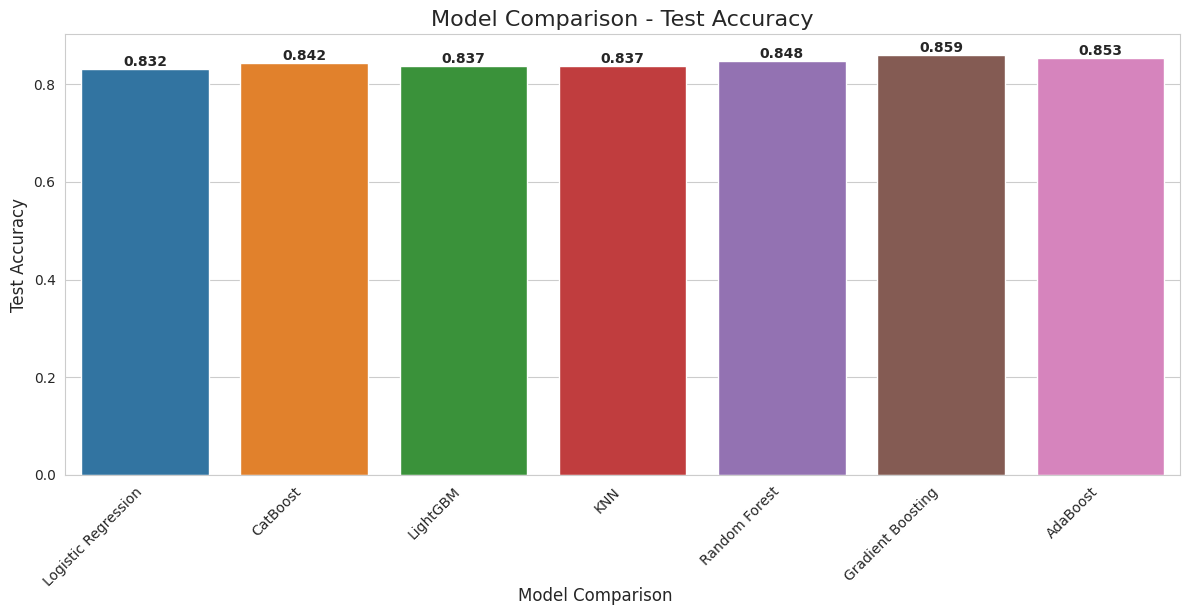

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Model Comparison', ha='center', fontsize=12)
plt.show()

In [ ]:
AdaBoost= fitted_models_1.get("AdaBoost")

In [ ]:
best_model = fitted_models["AdaBoost"]

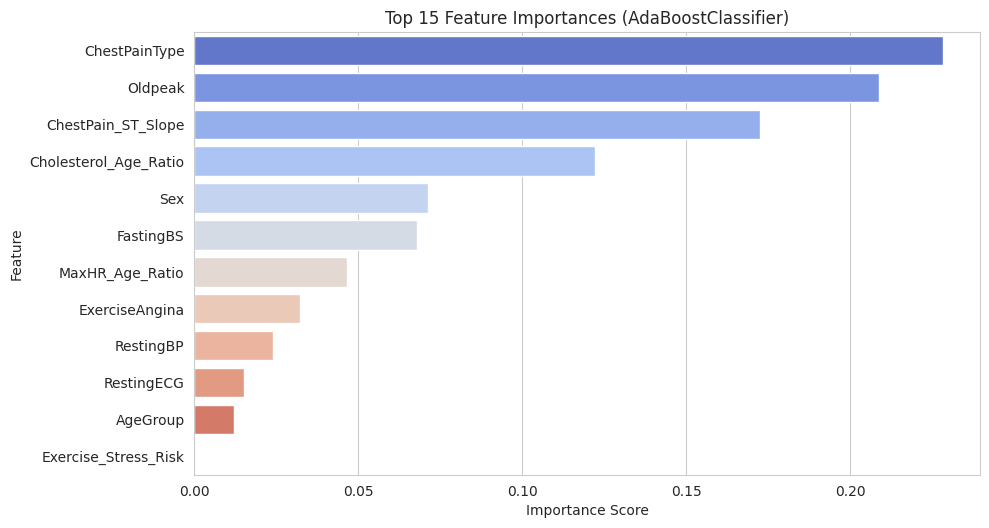


Top 15 Most Important Features:
                  Feature  Importance
1           ChestPainType    0.228085
6                 Oldpeak    0.208592
9      ChestPain_ST_Slope    0.172286
7   Cholesterol_Age_Ratio    0.122046
0                     Sex    0.071224
3               FastingBS    0.067923
8         MaxHR_Age_Ratio    0.046659
5          ExerciseAngina    0.032300
2               RestingBP    0.023941
4              RestingECG    0.014994
10               AgeGroup    0.011949
11   Exercise_Stress_Risk    0.000000


In [ ]:
def get_feature_importance(model, feature_names):
    """
    Extract feature importance for regression models.
    - For linear models: Uses absolute coefficients.
    - For tree-based models: Uses feature_importances_ attribute.
    """
    if hasattr(model, 'coef_'):  # Linear models (e.g., Linear Regression)
        importance_values = np.abs(model.coef_)

        # Handle cases where coef_ is multi-dimensional
        if importance_values.ndim > 1:
            importance_values = np.mean(importance_values, axis=0)

    elif hasattr(model, 'feature_importances_'):  # Tree-based models (e.g., Random Forest, Gradient Boosting)
        importance_values = model.feature_importances_

    else:
        print(f"{model.__class__.__name__} doesn't support feature importance extraction.")
        return None

    return pd.DataFrame({'Feature': feature_names, 'Importance': importance_values}).sort_values(by='Importance', ascending=False)

# Ensure feature names match dataset
original_feature_names = X_train.columns.tolist()

# Get feature importance for the best regression model
feature_importance = get_feature_importance(best_model, original_feature_names)

# Plot if available
if feature_importance is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15),
                hue="Feature", dodge=False, legend=False, palette="coolwarm")

    plt.title(f'Top 15 Feature Importances ({best_model.__class__.__name__})')
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15))
else:
    print("\nFeature importance not available for this model type.")

In [ ]:
with open('AdaBoost.pkl', 'wb') as f:
    pickle.dump(AdaBoost, f)

print("Trained model saved successfully!")

Trained model saved successfully!


In [1]:
with open('MinMaxScalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("MinMaxScalar Saved!")